<p style="text-align:center">
    <a href="https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023" target="_blank">
    <img src="spotify2023.jpg" width="200" alt="Forbes"  />
    </a>
</p>

# Spotify 2023


## Notebook
Analysis of Spotify Stats - 2023

### Objectives

In this lab:

-   Acquire data from kaggle
-   Obtain insights from data with Pandas library

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#data_introduction">Introduction</a>
    <li><a href="#data_acquisition">Data Acquisition</a>
    <li><a href="#basic_insight">Basic Insight of Dataset</a></li>
    <li><a href="#pattern_visualization">Analyzing Individual Feature Patterns Using Visualization</a></li>
</ol>


</div>
<hr>


<h1 id="data_introduction">Introduction</h1>

<p>This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.<br>
    
<ul>
    <li>Data source: <a href="https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023" target="_blank">https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023</a></li>
    <li>Data type: csv</li>
</ul>

</p>


<h1 id="data_acquisition">Data Acquisition</h1>

In [29]:
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
od.download("https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023")

Skipping, found downloaded files in ".\top-spotify-songs-2023" (use force=True to force download)


In [31]:
df_raw = pd.read_csv("top-spotify-songs-2023/spotify-2023.csv", encoding="ISO-8859-1")

In [32]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [33]:
df_raw.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [34]:
df_raw.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [35]:
df_raw.key.unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', nan, 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

In [36]:
df_raw.in_shazam_charts = df_raw.in_shazam_charts.str.replace(",","")
df_raw.in_shazam_charts = df_raw.in_shazam_charts.fillna("0")
df_raw.in_shazam_charts = df_raw.in_shazam_charts.astype(int)

df_raw.in_deezer_playlists = df_raw.in_deezer_playlists.str.replace(",","")
df_raw.in_deezer_playlists = df_raw.in_deezer_playlists.astype(int)

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int32 
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    int32 
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [44]:
df_raw = df_raw[df_raw['streams'] != "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3"]
df_raw.streams = df_raw.streams.astype(float)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    int32  
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      952 non-null    int32  
 14  bpm                   952 non-null    int64  
 15  key                   8

In [47]:
# df_raw.drop(['key'],axis=1,inplace=True)

# df_raw.info()

# # df_raw['mode'].value_counts()
# df_raw['mode'].unique() # Faster than value_counts()

In [48]:
df_clean = df_raw.dropna(axis=0, inplace=False)


In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            857 non-null    object 
 1   artist(s)_name        857 non-null    object 
 2   artist_count          857 non-null    int64  
 3   released_year         857 non-null    int64  
 4   released_month        857 non-null    int64  
 5   released_day          857 non-null    int64  
 6   in_spotify_playlists  857 non-null    int64  
 7   in_spotify_charts     857 non-null    int64  
 8   streams               857 non-null    float64
 9   in_apple_playlists    857 non-null    int64  
 10  in_apple_charts       857 non-null    int64  
 11  in_deezer_playlists   857 non-null    int32  
 12  in_deezer_charts      857 non-null    int64  
 13  in_shazam_charts      857 non-null    int32  
 14  bpm                   857 non-null    int64  
 15  key                   8

In [61]:
df_clean.corr()

C:\Users\Sumit\AppData\Local\Temp\ipykernel_14756\1863484124.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.corr()


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.076616,0.032990,-0.011917,-0.100919,-0.020673,-0.131273,-0.055404,-0.095824,-0.074836,-0.003529,-0.025501,-0.063419,0.207636,0.117233,0.135091,-0.101232,-0.055208,0.032083,0.131129
released_year,0.076616,1.000000,0.083459,0.171435,-0.387940,0.068413,-0.222450,-0.196616,-0.029040,-0.306275,0.096896,0.023585,-0.010362,0.200100,-0.055269,0.097239,-0.150987,-0.020374,-0.011370,0.134253
released_month,0.032990,0.083459,1.000000,0.068443,-0.109876,-0.037911,-0.026944,-0.010285,-0.017907,-0.093101,0.008414,-0.086404,-0.043506,-0.063124,-0.114357,-0.077919,0.043163,0.034562,-0.003034,0.045511
released_day,-0.011917,0.171435,0.068443,1.000000,-0.088851,0.036835,-0.000371,0.009003,0.004471,-0.088525,0.079907,0.027636,-0.021101,0.064164,0.056769,0.053526,-0.009193,0.023780,-0.021384,-0.016784
in_spotify_playlists,-0.100919,-0.387940,-0.109876,-0.088851,1.000000,0.173381,0.787825,0.708076,0.259238,0.824438,0.147740,0.061626,-0.018566,-0.103279,-0.021648,0.039666,-0.056214,-0.031697,-0.049014,-0.090344
in_spotify_charts,-0.020673,0.068413,-0.037911,0.036835,0.173381,1.000000,0.252665,0.234889,0.551774,0.096513,0.581722,0.537362,0.039211,0.030249,0.036794,0.105216,-0.064086,-0.007873,-0.029890,-0.098284
streams,-0.131273,-0.222450,-0.026944,-0.000371,0.787825,0.252665,1.000000,0.774445,0.313651,0.600182,0.233967,-0.014367,-0.002163,-0.100702,-0.042787,-0.029714,0.010798,-0.043068,-0.054275,-0.112896
in_apple_playlists,-0.055404,-0.196616,-0.010285,0.009003,0.708076,0.234889,0.774445,1.000000,0.408485,0.472228,0.359006,0.086597,0.030178,-0.025617,0.052390,0.045562,-0.050028,-0.061521,-0.063207,-0.108237
in_apple_charts,-0.095824,-0.029040,-0.017907,0.004471,0.259238,0.551774,0.313651,0.408485,1.000000,0.162103,0.370896,0.390228,0.034633,-0.028701,0.046622,0.124038,-0.088594,-0.007183,-0.014382,-0.150397
in_deezer_playlists,-0.074836,-0.306275,-0.093101,-0.088525,0.824438,0.096513,0.600182,0.472228,0.162103,1.000000,0.064823,0.075315,-0.033283,-0.074460,-0.011775,0.084268,-0.069214,-0.015830,-0.027949,-0.064106


In [63]:
df_clean.released_year.describe()

count     857.000000
mean     2018.297550
std        10.991135
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000
max      2023.000000
Name: released_year, dtype: float64

In [64]:
df_clean.head(15)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,1.413817e+08,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,1.337163e+08,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,1.400040e+08,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,8.008408e+08,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,3.032363e+08,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,1.837062e+08,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,7.259801e+08,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,5.814938e+07,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,9.521732e+07,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,5.536341e+08,49,...,170,D,Minor,81,56,48,21,0,8,33


In [65]:
#  
spty = df_clean.loc[:,['released_year','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']]

In [66]:
spty_gi = spty.groupby(['released_year'],as_index=True).mean()
spty_g = spty.groupby(['released_year'],as_index=False).mean()
spty_gi.head(10)

,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
released_year,,,,,,,
1930,65.000000,49.000000,80.0,22.000000,4.0,7.000000,5.0
1942,23.000000,19.000000,25.0,91.000000,0.0,40.000000,3.0
1946,36.000000,22.000000,15.0,84.000000,0.0,11.000000,4.0
1950,60.000000,86.000000,32.0,88.000000,0.0,34.000000,6.0
1957,62.500000,86.000000,35.5,78.500000,0.0,8.000000,4.0
1958,70.666667,83.666667,48.0,75.666667,0.0,22.333333,6.0
1959,57.000000,84.000000,30.0,86.000000,0.0,13.000000,4.0
1963,37.000000,65.000000,71.0,52.000000,0.0,17.333333,4.0
1970,50.000000,96.000000,82.0,47.000000,0.0,34.000000,4.0


<Axes: xlabel='released_year'>

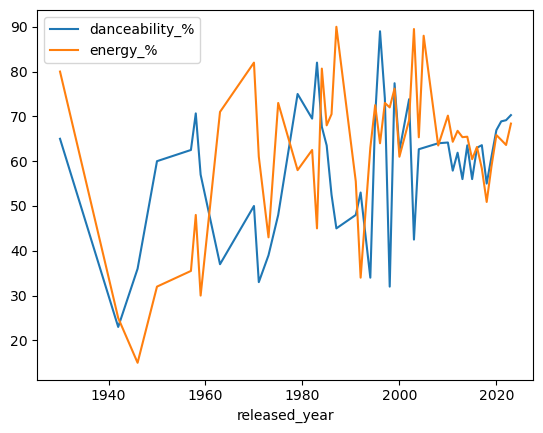

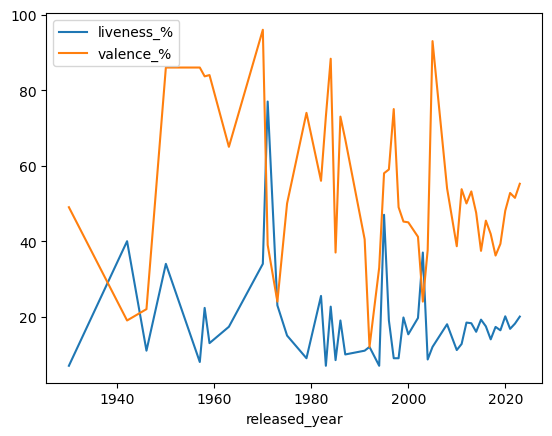

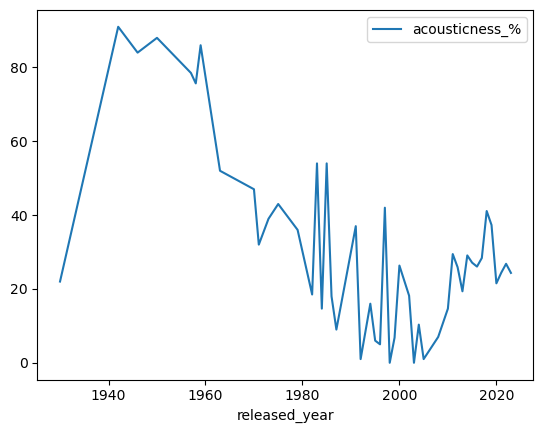

In [74]:
spty_gi.plot.line(y=['danceability_%','energy_%'])
spty_gi.plot.line(y=['liveness_%','valence_%'])
spty_gi.plot.line(y="acousticness_%")
